# Introduction
[Kiva.org](https://www.kiva.org/) is an online crowdfunding platform extending financial services to poor people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people.

<center>
<img src="https://i.imgur.com/2G8C53X.png" width="500"><br/>
</center>

Kiva reaches some of the most remote places in the world through their global network of "Field Partners". These partners are local organizations working in communities to vet borrowers, provide services, and administer loans.

In this exercise, you'll investigate Kiva loans in the Philippines.  Can you identify regions that might be outside of Kiva's current network, in order to identify opportunities for recruiting new Field Partners?

To get started, run the code cell below to set up our feedback system.


In [1]:
# Here I'll use the kaggle dataset from Geospatial Data Analysis Course https://www.kaggle.com/alexisbcook/geospatial-learn-course-data
# At first let me Mount my drive to get the dataset
HOME_PATH = "/content"
%cd "$HOME_PATH"
from google.colab import drive 
drive.mount("/content/drive")
# Kaggle dataset path
DATASET_PATH = "/content/drive/My Drive/Data Science/data/geospatial-data/kaggle/"

/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Intorduction to geopandas 
https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb
**bold text**



In [29]:
%%time 
#To install geopandas follow this
#Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
#Install rtree - Geopandas requirment
!apt install python3-rtree 
#Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
#Install descartes - Geopandas requirment
!pip install descartes 
#Install Folium for Geographic data visualization
!pip install folium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-g8rmk3o_
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-g8rmk3o_
  Created wheel for geopandas: filename=geopandas-0.9.0+40.g72583fd-py2.py3-none-any.whl size=996488 sha256=ff6c5beb015818bef86bcfa063877ea2ebf358caaf6c1a36cae11b6b084be614
  Stored in directory: /tmp/pip-ephem-wheel-cache-nt19yffn/wheels/91/24/71/376c9c67192694168352

In [74]:
!pip install plotly==5.1.0
#Install plotlyExpress
!pip install plotly_express
! pip install jupyter_dash
! pip install --upgrade plotly

     |████████████████████████████████| 81kB 4.0MB/s 
     |████████████████████████████████| 1.0MB 29.7MB/s 
     |████████████████████████████████| 3.5MB 27.7MB/s 
     |████████████████████████████████| 92kB 7.3MB/s 
     |████████████████████████████████| 1.8MB 33.8MB/s 
     |████████████████████████████████| 358kB 31.8MB/s 
  Created wheel for dash: filename=dash-1.20.0-cp37-none-any.whl size=85845 sha256=cb1d1a324f953afe91527fac6dc786243c80f1ccdb1aafc3bca71defe77ccba0
  Stored in directory: /root/.cache/pip/wheels/e6/33/41/ce361d0d1da277d2350f815b10f2ab1e331592d93ef2b07e29
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-cp37-none-any.whl size=1014873 sha256=376db4ddd36b462d4ddb5ef5399acb09312abe57536e0998d4eaf5bccfaf1529
  Stored in directory: /root/.cache/pip/wheels/03/a9/c5/dd5815c601b0ede164c223ffd7bafebde716ca57de06ef8aec
  Created wheel for dash-core-components: filename=dash_core_components-1.16.0-cp37-none-any.whl size=3540992 sha256=7028e20911064cc94eb815

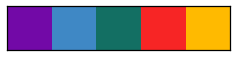

In [2]:
# Import libraries 
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # To display all columns in pandas
import geopandas as gpd 
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium 
import dash 
from jupyter_dash import JupyterDash 
import dash_core_components as dcc 
import dash_html_components as html 
import plotly.express as px
from dash.dependencies import Input, Output
import seaborn as sns
import json
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
def custom_palette(custom_colors):
  custome_palette = sns.set_palette(sns.color_palette(custom_colors))
  sns.palplot(sns.color_palette(custom_colors), size=0.8)
  plt.tick_params(axis='both', labelsize=0, length=0)
palette = ["#7209A7", "#3F88C5", "#136F63", "#F72525", "#FFBA00"]
custom_palette(palette)
import time
import datetime
from datetime import date, timedelta

### 1) Get the data.

Use the next cell to load the shapefile located at `loans_filepath` to create a GeoDataFrame `world_loans`.  

In [3]:
loans_filepath = f'{DATASET_PATH}kiva_loans/kiva_loans/kiva_loans.shp'
# Let's read the file
world_loans = gpd.read_file(loans_filepath)
# Preview the first five rows of the data
world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


### 2) Plot the data.

Run the next code cell without changes to load a GeoDataFrame `world` containing country boundaries.

In [4]:
# The World dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


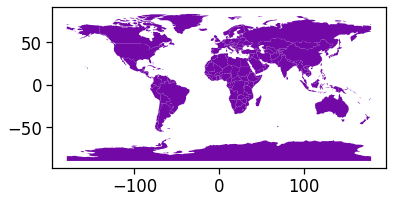

In [34]:
world.plot()

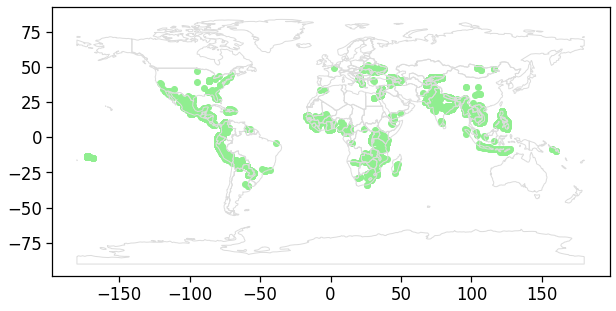

In [35]:
# Let's use the world and world_loans GeoDataFrames to visualize Kiva loan locations across the world.
# Define a base map with world boundaries
ax = world.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)
# Add loan locations provided by kiva
world_loans.plot(color='lightgreen', ax=ax)

In [73]:
import pyproj
import plotly.express as px
fig = px.scatter_mapbox(world_loans, lat=world_loans.geometry.y, lon=world_loans.geometry.x, hover_name="country", #hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
"""
fig.update_layout(
    title_text='Map'
)
fig.update(layout = dict(title=dict(x=0.5)))
fig.update_layout(
    margin={"r":0,"t":30,"l":10,"b":10},
    coloraxis_colorbar={
        'title':'Sum'})
fig.show()
"""

'\nfig.update_layout(\n    title_text=\'Map\'\n)\nfig.update(layout = dict(title=dict(x=0.5)))\nfig.update_layout(\n    margin={"r":0,"t":30,"l":10,"b":10},\n    coloraxis_colorbar={\n        \'title\':\'Sum\'})\nfig.show()\n'

In [81]:
"""
app = JupyterDash(__name__)


app.layout = html.Div(
    [ 
        dcc.Graph(id="graph")
    ]
)

@app.callback(Output("graph", "figure")) #, [Input("date", "value"), Input("color", "value")]
def update_graph():
  #px.set_mapbox_access_token(MAPBOX_TOKEN)
  #if not color:
  #  color = date
  return  px.scatter_mapbox(world_loans,
                        lat=world_loans.geometry.y,
                        lon=world_loans.geometry.x,
                        #color=color,
                        size="amount",
                        size_max=20,
                        zoom=0,
                        #center={'lat': 35, 'lon': 135},
                        title="各国のコロナ感染者数",
                        color_continuous_scale=px.colors.diverging.BrBG,
                        hover_name="country")
#px.scatter_mapbox(, lat=, lon=, hover_name="country", #hover_data=["State", "Population"],
#                        color_discrete_sequence=["fuchsia"], zoom=3, height=500)
app.run_server(mode="inline")
"""

<IPython.core.display.Javascript object>

In [7]:
app = JupyterDash(__name__)
fig=px.scatter_mapbox(world_loans, lat=world_loans.geometry.y, lon=world_loans.geometry.x, hover_name="country", #hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
"""
fig = px.scatter_mapbox(world_loans,
                        lat=world_loans.geometry.y,
                        lon=world_loans.geometry.x,
                        #color=color,
                        size="amount",
                        size_max=20,
                        zoom=0,
                        #center={'lat': 35, 'lon': 135},
                        title="各国のコロナ感染者数",
                        color_continuous_scale=px.colors.diverging.BrBG,
                        hover_name="country") # or any Plotly Express function e.g. px.bar(...)
"""
# fig.add_trace( ... )
# fig.update_layout( ... )

app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(mode="inline")#, debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

<IPython.core.display.Javascript object>